# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции 

## Programming Assignment (Week-3) ##

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

Инструкция по выполнению
Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

__Задача 1. Минимизация гладкой функции__
1. Рассмотрим все ту же функцию из задания по линейной алгебре: 
$$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$$
но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

Код и результаты:

Task1:
1.7452682903447336
-11.898894665981313


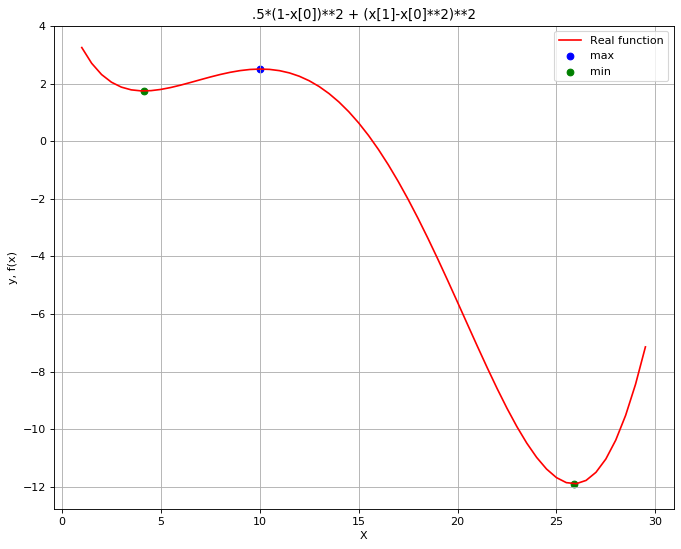

In [1]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

def f(x) :
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)
def g(x):
    return -f(x)
def h(x):
    return f(x).astype(int)

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

x = np.arange(1,30,.5)
res = optimize.minimize(g, x0=5, method='BFGS')                 #Task 1 - Simple minimize
plt.scatter(res.x, f(res.x), color='blue', label='max')  #Task 1.1 - Simple maximum (reversed func)


res = optimize.minimize(f, x0=2, method='BFGS')
plt.scatter(res.x, res.fun, color='g', label='min')
plt.plot(x, f(x), 'r-', label='Real function')
print('Task1:') 
print (res.fun)

res = optimize.minimize(f, x0=30, method='BFGS')
plt.scatter(res.x, res.fun, color='g')
print (res.fun)

plt.title('.5*(1-x[0])**2 + (x[1]-x[0]**2)**2')
plt.xlabel('X')
plt.ylabel('y, f(x)')
plt.grid()
plt.legend()
plt.show()

__Задача 2. Глобальная оптимизация__

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

__Задача 3. Минимизация негладкой функции__

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

Код и результаты:

Task2:  [-11.89889467]
Task3:
[1]
-11.0


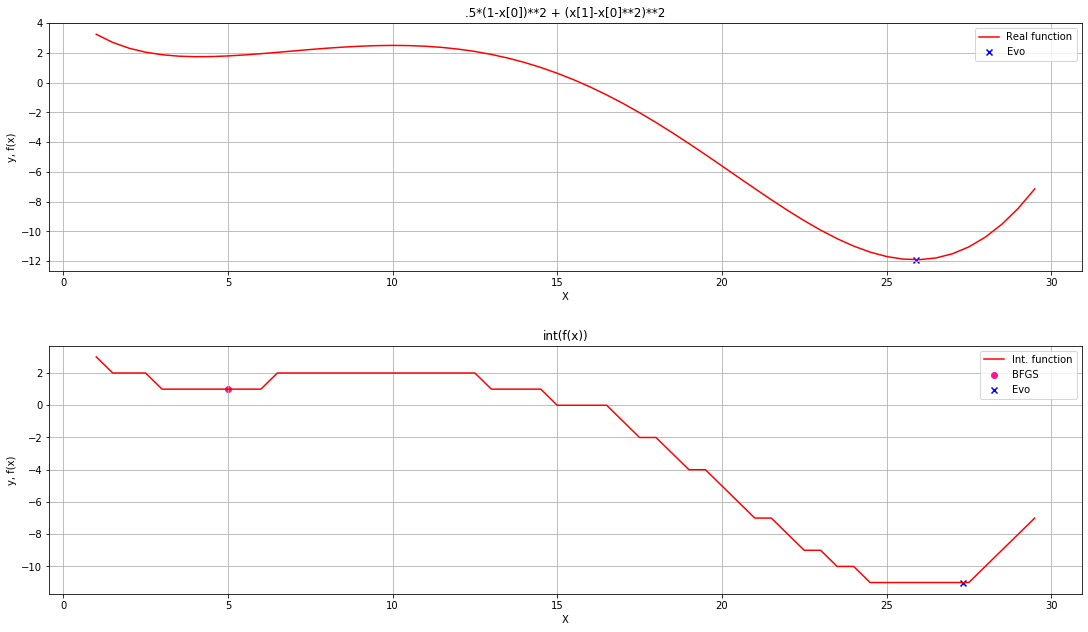

In [2]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

def f(x) :
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)
def h(x):
    return f(x).astype(int)

x = np.arange(1,30,.5)

fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=.3)
fig.set_size_inches(18.5, 10.5)

res = optimize.differential_evolution(f, bounds=[(1, 30)])      #Task 2 - evolution
ax[0].scatter(res.x, f(res.x), marker = 'x', color='blue', label='Evo')
print('Task2: ', res.fun)

res = optimize.minimize(h, x0=5, method='BFGS')                 #Task 3.1 - Int(f(X))
ax[1].scatter(res.x, h(res.x), color='deeppink', label='BFGS')
print('Task3:') 
print(res.fun)

res = optimize.differential_evolution(h, bounds=[(1, 30)])      #Task 3.2 - evolution
ax[1].scatter(res.x, h(res.x), marker = 'x', color='blue', label='Evo')
print(res.fun)

fig.subplots_adjust(hspace=.3)
ax[0].plot(x, f(x), 'r-', label='Real function')
ax[1].plot(x, h(x), 'r-', label='Int. function')

ax[0].set_title('.5*(1-x[0])**2 + (x[1]-x[0]**2)**2')
ax[1].set_title('int(f(x))')
ax[1].set_xlabel('X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y, f(x)')
ax[1].set_ylabel('y, f(x)')
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()